In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Events

In [11]:
df_events = pd.read_csv('../event_streams/actions.csv')
df_events.head()

,Unnamed: 0,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,result_name,bodypart_name
0,0,2500089,1,2.763597,1659,9637,52.50,34.00,63.00,30.60,251700146.0,0,0,1,0,pass,success,foot
1,1,2500089,1,4.761353,1659,8351,63.00,30.60,64.05,10.20,251700147.0,0,0,1,1,pass,success,foot
2,2,2500089,1,5.533097,1659,9285,64.05,10.20,72.45,20.40,251700148.0,0,0,1,2,pass,success,foot
3,3,2500089,1,7.707561,1659,239411,72.45,20.40,35.70,19.04,251700161.0,0,0,1,3,pass,success,foot
4,4,2500089,1,11.614943,1659,9637,35.70,19.04,30.45,12.24,251700149.0,0,0,1,4,pass,success,foot


In [12]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2462726 entries, 0 to 2462725
Data columns (total 18 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   game_id            int64  
 2   period_id          int64  
 3   time_seconds       float64
 4   team_id            int64  
 5   player_id          int64  
 6   start_x            float64
 7   start_y            float64
 8   end_x              float64
 9   end_y              float64
 10  original_event_id  float64
 11  bodypart_id        int64  
 12  type_id            int64  
 13  result_id          int64  
 14  action_id          int64  
 15  type_name          object 
 16  result_name        object 
 17  bodypart_name      object 
dtypes: float64(6), int64(9), object(3)
memory usage: 338.2+ MB


#### Remove missing values

In [13]:
df_events = df_events.dropna()

In [14]:
df_events.describe()

,Unnamed: 0,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id
count,2.294126e+06,2.294126e+06,2.294126e+06,2.294126e+06,2.294126e+06,2.294126e+06,2.294126e+06,2.294126e+06,2.294126e+06,2.294126e+06,2.294126e+06,2.294126e+06,2.294126e+06,2.294126e+06,2.294126e+06
mean,1.231824e+06,2.495628e+06,1.496138e+00,1.380288e+03,2.990746e+03,8.670832e+04,5.556486e+01,3.392740e+01,4.794143e+01,3.384607e+01,2.157923e+08,1.530635e-01,2.508873e+00,8.025021e-01,6.380792e+02
std,7.109065e+05,1.584014e+05,5.064205e-01,8.320571e+02,2.899007e+03,1.152087e+05,2.531685e+01,2.014738e+01,2.554393e+01,2.020340e+01,3.017326e+07,4.970086e-01,5.165470e+00,4.060769e-01,3.748044e+02
min,0.000000e+00,1.694390e+06,1.000000e+00,0.000000e+00,6.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.817864e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.161415e+05,2.500090e+06,1.000000e+00,6.530511e+02,1.613000e+03,8.945000e+03,3.570000e+01,1.632000e+01,2.940000e+01,1.632000e+01,1.988792e+08,0.000000e+00,0.000000e+00,1.000000e+00,3.160000e+02
50%,1.231940e+06,2.516840e+06,1.000000e+00,1.361691e+03,2.460000e+03,2.552400e+04,5.775000e+01,3.400000e+01,4.620000e+01,3.400000e+01,2.190778e+08,0.000000e+00,0.000000e+00,1.000000e+00,6.330000e+02
75%,1.847746e+06,2.565832e+06,2.000000e+00,2.094601e+03,3.766000e+03,1.343830e+05,7.455000e+01,5.100000e+01,6.825000e+01,5.168000e+01,2.352287e+08,0.000000e+00,2.000000e+00,1.000000e+00,9.510000e+02
max,2.462725e+06,2.576338e+06,5.000000e+00,3.534783e+03,1.983000e+04,5.685830e+05,1.050000e+02,6.800000e+01,1.050000e+02,6.800000e+01,2.802175e+08,3.000000e+00,2.200000e+01,3.000000e+00,1.803000e+03


#### Main Events

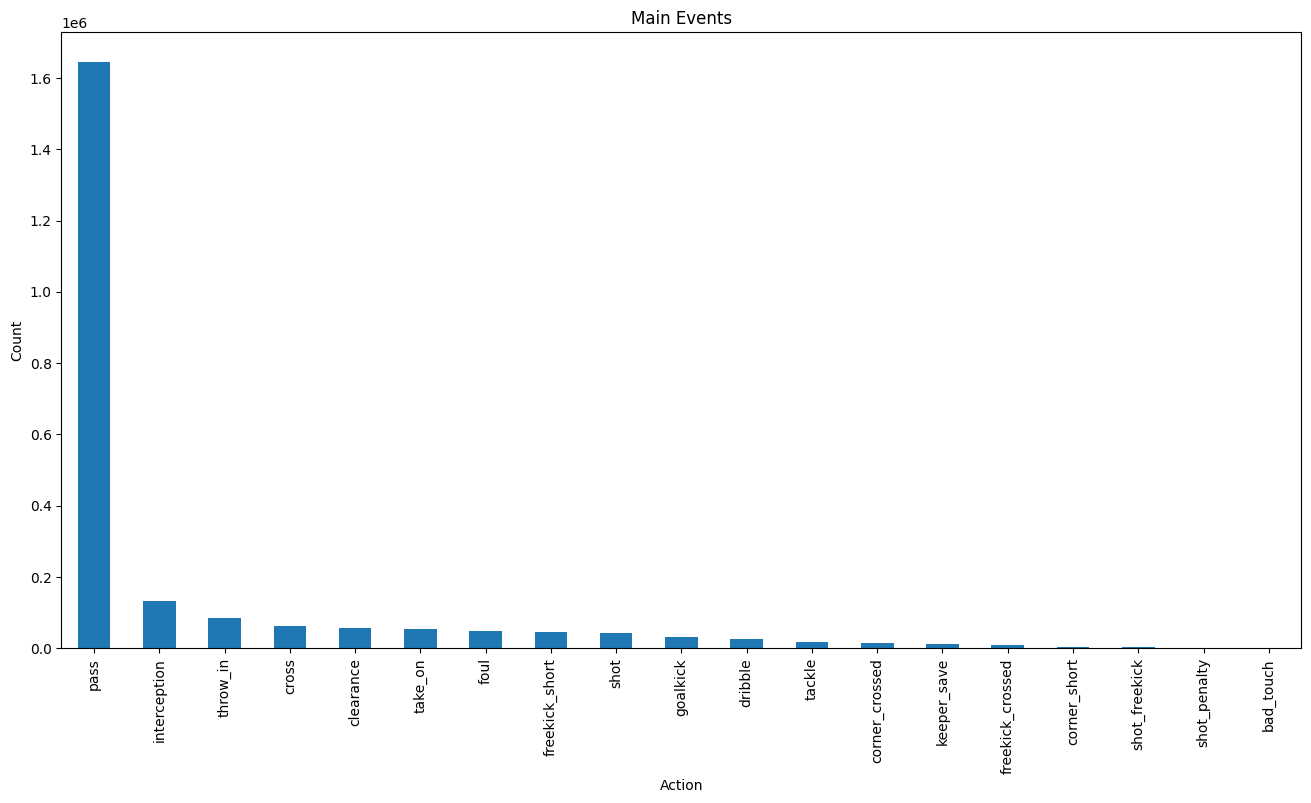

In [15]:
# Plot number of performed actions interesting, zipfs law also lives in football actions :)
plt.figure(figsize=(16, 8))
df_events['type_name'].value_counts().plot.bar()
plt.xlabel('Action')
plt.ylabel('Count')
plt.title('Main Events')
plt.show()

In [16]:
print(df_events['type_name'].value_counts())

type_name
pass                1646227
interception         133174
throw_in              85075
cross                 62326
clearance             56790
take_on               54400
foul                  49292
freekick_short        45556
shot                  43071
goalkick              31795
dribble               25877
tackle                17022
corner_crossed        15041
keeper_save           12531
freekick_crossed       8644
corner_short           4271
shot_freekick          2208
shot_penalty            658
bad_touch               168
Name: count, dtype: int64


#### Sub Events

In [17]:
# Plot number of performed actions interesting, zipfs law also lives in football actions :)
plt.figure(figsize=(16, 8))
df_events['subEventName'].value_counts().plot.bar()
plt.xlabel('Sub event')
plt.ylabel('Count')
plt.title('Sub Events')
plt.show()

KeyError: 'subEventName'

<Figure size 1600x800 with 0 Axes>

In [9]:
print(df_events['subEventName'].value_counts())

subEventName
Simple pass                198711
Ground attacking duel       44339
Ground defending duel       44161
Air duel                    29442
Ground loose ball duel      26226
High pass                   20857
Head pass                   17083
Throw in                    13682
Touch                       13207
Cross                        9031
Clearance                    8796
Launch                       8714
Free Kick                    7747
Shot                         6896
Smart pass                   4622
Acceleration                 3960
Corner                       2891
Hand pass                    2418
Reflexes                     1814
Free kick cross              1526
Save attempt                  996
Foul                          845
Free kick shot                299
Penalty                        93
Out of game foul               67
Protest                        65
Late card foul                 42
Goalkeeper leaving line        35
Time lost foul                 32
H